In [1]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [3]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [4]:
numeric_columns = train_df.select_dtypes(include=np.number).columns

<Axes: >

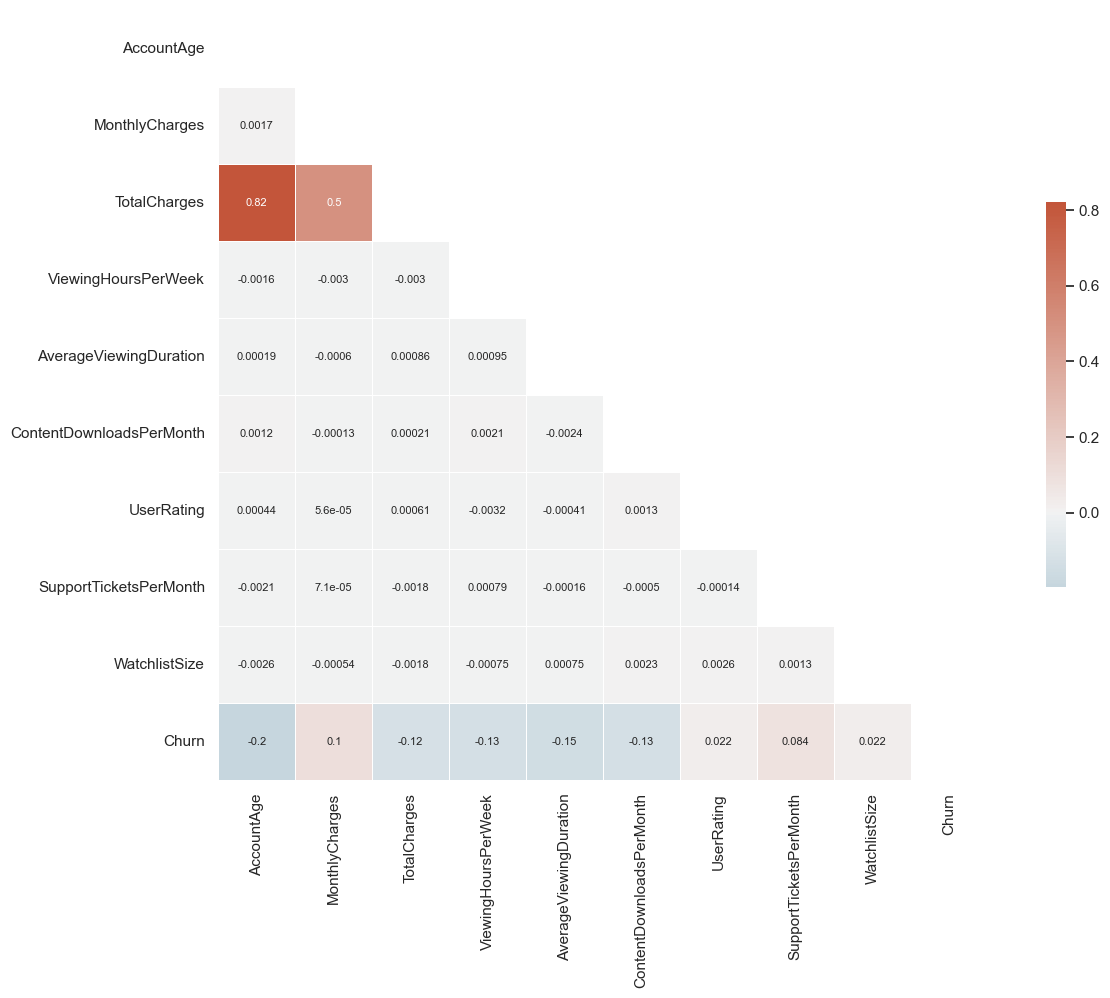

In [5]:
sns.set_theme(style="white")


corr = train_df[numeric_columns].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

In [6]:
#One-hot encoding 
columns_cat={'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered','GenrePreference','Gender','ParentalControl','SubtitlesEnabled'}

In [7]:
columns_to_dummify = ['Gender', 'ParentalControl', 'SubtitlesEnabled', 'PaperlessBilling', 'MultiDeviceAccess']
dummies = pd.get_dummies(train_df[columns_to_dummify], drop_first=True)


#dummies=pd.get_dummies(train_df['Gender','ParentalControl','SubtitlesEnabled','PaperlessBilling','MultiDeviceAccess'],axis=1)

dummies=dummies*1

dummies.head()

,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes,PaperlessBilling_Yes,MultiDeviceAccess_Yes
0,1,0,0,0,0
1,1,0,1,1,0
2,1,1,1,1,0
3,1,1,1,0,0
4,0,0,0,1,0


In [8]:
ord_df=train_df.copy()

In [9]:
ord_encodings_sub = {
    'Premium':3,
    'Standard':2,
    'Basic':1
}

ord_df['SubscriptionType_ord_enc']=ord_df['SubscriptionType'].map(ord_encodings_sub)

In [10]:
ord_encodings_payment = {
    'Credit card':4,
    'Bank transfer':3,
    'Electronic check':2,
    'Mailed check':1
}

ord_df['PaymentMethod_ord_enc']=ord_df['PaymentMethod'].map(ord_encodings_payment)

In [11]:
ord_encodings_devices = {
    'TV':4,
    'Mobile':3,
    'Computer':2,
    'Tablet':1
}

ord_df['DeviceRegistered_ord_enc']=ord_df['DeviceRegistered'].map(ord_encodings_devices)

In [12]:
ord_encodings_content = {
    'Both':3,
    'Movies':2,
    'TV Shows':1
}

ord_df['ContentType_ord_enc']=ord_df['ContentType'].map(ord_encodings_content)

In [13]:
ord_encodings_pref = {
    'Sci-Fi':5,
    'Action':4,
    'Fantasy':3,
    'Drama':2,
    'Comedy':1
}

ord_df['GenrePreference_ord_enc']=ord_df['GenrePreference'].map(ord_encodings_pref)

In [14]:
columns_to_drop={'Gender','SubscriptionType','PaymentMethod','DeviceRegistered','ContentType','GenrePreference','AccountAge','MonthlyCharges','TotalCharges','PaperlessBilling','MultiDeviceAccess','ViewingHoursPerWeek','AverageViewingDuration','ContentDownloadsPerMonth','UserRating','SupportTicketsPerMonth','WatchlistSize','ParentalControl','SubtitlesEnabled','CustomerID','Churn'}

ord_encoded=ord_df.drop(columns=columns_to_drop, axis=1)

ord_encoded.head()

,SubscriptionType_ord_enc,PaymentMethod_ord_enc,DeviceRegistered_ord_enc,ContentType_ord_enc,GenrePreference_ord_enc
0,3,1,3,3,5
1,1,4,1,2,4
2,1,1,2,2,3
3,1,2,1,1,2
4,3,2,4,1,1


In [15]:
train_encoded_final=pd.concat([train_df,dummies,ord_encoded], axis = 1)

train_encoded_final.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes,PaperlessBilling_Yes,MultiDeviceAccess_Yes,SubscriptionType_ord_enc,PaymentMethod_ord_enc,DeviceRegistered_ord_enc,ContentType_ord_enc,GenrePreference_ord_enc
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,1,0,0,0,0,3,1,3,3,5
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,1,0,1,1,0,1,4,1,2,4
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,1,1,1,1,0,1,1,2,2,3
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,1,1,1,0,0,1,2,1,1,2
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,0,0,0,1,0,3,2,4,1,1


In [16]:
columns_to_drop_train={'Gender', 'ParentalControl', 'SubtitlesEnabled', 'PaperlessBilling', 'MultiDeviceAccess','SubscriptionType','PaymentMethod','ContentType','DeviceRegistered','GenrePreference','CustomerID'}

train_enc_f1=train_encoded_final.drop(columns=columns_to_drop_train, axis=1)

In [17]:
train_enc_final_copy=train_enc_f1.copy()

In [18]:
train_enc_f1

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes,PaperlessBilling_Yes,MultiDeviceAccess_Yes,SubscriptionType_ord_enc,PaymentMethod_ord_enc,DeviceRegistered_ord_enc,ContentType_ord_enc,GenrePreference_ord_enc
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,1,0,0,0,0,3,1,3,3,5
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,1,0,1,1,0,1,4,1,2,4
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,1,1,1,1,0,1,1,2,2,3
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,1,1,1,0,0,1,2,1,1,2
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,0,0,0,1,0,3,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,13.502729,80.367312,47,3.697451,1,8,0,1,1,0,0,0,1,1,2,2,5
243783,117,13.049257,1526.763053,24.963291,59.818441,35,1.449742,4,20,0,1,0,0,0,1,3,4,4,1,1
243784,113,14.514569,1640.146267,10.628728,176.186095,44,4.012217,6,13,0,1,1,1,1,0,3,4,4,1,4
243785,7,18.140555,126.983887,30.466782,153.386315,36,2.135789,7,5,0,0,0,1,1,0,3,3,4,1,3


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [20]:
def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        
        
        print("\n======================Train Result=================")
        
        print(f"AccuracScore:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    
    elif train==False:
        pred=clf.predict(X_test)
        
        print("\n======================Test Result=================")
        
        print(f"AccuracScore:{accuracy_score(y_test,pred)*100:.2f}%")
        
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

In [21]:
X=train_enc_f1.drop(columns=['Churn'],axis=1)
y=train_enc_f1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=57)

In [22]:
#RandomOver Sampling
from imblearn.over_sampling import RandomOverSampler

o_smpl = RandomOverSampler(random_state = 57) 

X_o_smpl, y_o_smpl = o_smpl.fit_resample(X_train,y_train)

In [23]:
#RandomOver Sampling
from imblearn.over_sampling import RandomOverSampler

o_smpl = RandomOverSampler(random_state = 57) 

Xt_o_smpl, yt_o_smpl = o_smpl.fit_resample(X_test,y_test)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score
from imblearn.over_sampling import SMOTE

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the model with class weight adjustment
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


              precision    recall  f1-score   support

           0       0.85      0.87      0.86     39968
           1       0.34      0.31      0.32      8790

    accuracy                           0.77     48758
   macro avg       0.59      0.59      0.59     48758
weighted avg       0.76      0.77      0.76     48758

Precision-Recall AUC: 0.30
F1-score: 0.32


In [25]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]), random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


              precision    recall  f1-score   support

           0       0.86      0.81      0.83     39968
           1       0.31      0.40      0.35      8790

    accuracy                           0.73     48758
   macro avg       0.59      0.60      0.59     48758
weighted avg       0.76      0.73      0.75     48758

Precision-Recall AUC: 0.30
F1-score: 0.35


In [26]:
from xgboost import XGBClassifier

# Calculate the scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize and train the model with cost-sensitive learning
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


              precision    recall  f1-score   support

           0       0.90      0.69      0.78     39968
           1       0.32      0.66      0.43      8790

    accuracy                           0.68     48758
   macro avg       0.61      0.68      0.61     48758
weighted avg       0.80      0.68      0.72     48758

Precision-Recall AUC: 0.38
F1-score: 0.43


In [27]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score

# Calculate the scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight]  # Using the calculated scale_pos_weight
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


Fitting 3 folds for each of 324 candidates, totalling 972 fits
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     39968
           1       0.33      0.64      0.44      8790

    accuracy                           0.71     48758
   macro avg       0.62      0.68      0.62     48758
weighted avg       0.80      0.71      0.73     48758

Precision-Recall AUC: 0.39
F1-score: 0.44


In [28]:
import numpy as np
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Find the best threshold
thresholds = np.arange(0.0, 1.1, 0.1)
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

best_threshold = thresholds[np.argmax(f1_scores)]

# Predict with the best threshold
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# Print the classification report
print(f"Best Threshold: {best_threshold}")
print(classification_report(y_test, y_pred_adjusted))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_adjusted)
print(f'F1-score: {f1:.2f}')


Best Threshold: 0.5
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     39968
           1       0.33      0.64      0.44      8790

    accuracy                           0.71     48758
   macro avg       0.62      0.68      0.62     48758
weighted avg       0.80      0.71      0.73     48758

Precision-Recall AUC: 0.39
F1-score: 0.44


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature selection
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_poly, y_train)
X_test_selected = rfe.transform(X_test_poly)

# Train the XGBoost model with selected features
best_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


In [30]:
from sklearn.preprocessing import RobustScaler

# Copy the original DataFrame to avoid modifying it directly
train_enc_f1_scaled = train_enc_f1.copy()

# List of columns to scale
columns_to_scale = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                    'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
                    'SupportTicketsPerMonth', 'WatchlistSize']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the specified columns and transform them
train_enc_f1_scaled[columns_to_scale] = scaler.fit_transform(train_enc_f1_scaled[columns_to_scale])

# Display the scaled DataFrame
print(train_enc_f1_scaled)

        AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0        -0.666667       -0.192055     -0.564050             0.834470   
1        -0.050000       -0.976096     -0.466858             0.613065   
2         0.216667       -0.051856      0.307704            -0.674770   
3        -0.466667       -0.697611     -0.549138             0.382272   
4        -0.050000        0.594367      0.416284            -0.022601   
...            ...             ...           ...                  ...   
243782    0.283333       -0.380773      0.121544            -0.360844   
243783    0.950000        0.073831      1.153537             0.228223   
243784    0.883333        0.269216      1.302692            -0.508567   
243785   -0.883333        0.752705     -0.687865             0.511099   
243786    0.500000       -0.120244      0.517728             0.228698   

        AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0                    -0.328117                     

In [31]:
X=train_enc_f1_scaled.drop(columns=['Churn'],axis=1)
y=train_enc_f1_scaled['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=57)

In [32]:
from xgboost import XGBClassifier

# Calculate the scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize and train the model with cost-sensitive learning
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


              precision    recall  f1-score   support

           0       0.90      0.69      0.78     49846
           1       0.32      0.66      0.43     11101

    accuracy                           0.68     60947
   macro avg       0.61      0.67      0.61     60947
weighted avg       0.79      0.68      0.72     60947

Precision-Recall AUC: 0.38
F1-score: 0.43


In [79]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7342861387363685


In [34]:
!pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.6 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 4.7 MB/s eta 0:00:01
   ------------------------------------- -- 1.2/1.3 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 9.4 MB/s eta 0:00:00


In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Define base models
estimators = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42))
]

# Define stacking model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


[LightGBM] [Info] Number of positive: 33081, number of negative: 149759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1513
[LightGBM] [Info] Number of data points in the train set: 182840, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 26465, number of negative: 119807
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1513
[LightGBM] [Info] Number of data points in the train set: 146272, number of used features: 19
[LightGBM] [In

In [36]:
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score

# Apply SMOTE + Tomek Links to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Initialize and train the model
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


              precision    recall  f1-score   support

           0       0.91      0.61      0.73     49846
           1       0.29      0.73      0.42     11101

    accuracy                           0.63     60947
   macro avg       0.60      0.67      0.57     60947
weighted avg       0.80      0.63      0.67     60947

Precision-Recall AUC: 0.38
F1-score: 0.42


In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature selection
rfe = RFE(estimator=XGBClassifier(), n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_poly, y_train)
X_test_selected = rfe.transform(X_test_poly)

# Train the XGBoost model with selected features
best_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


              precision    recall  f1-score   support

           0       0.90      0.69      0.78     49846
           1       0.32      0.64      0.43     11101

    accuracy                           0.68     60947
   macro avg       0.61      0.67      0.60     60947
weighted avg       0.79      0.68      0.72     60947

Precision-Recall AUC: 0.37
F1-score: 0.43


In [78]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7342861387363685


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.83      0.98      0.90     49846
           1       0.58      0.09      0.16     11101

    accuracy                           0.82     60947
   macro avg       0.70      0.54      0.53     60947
weighted avg       0.78      0.82      0.77     60947



In [40]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature importances
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {feature_importances[i]}")


AverageViewingDuration: 0.13274797797203064
AccountAge: 0.11293553560972214
TotalCharges: 0.10465440899133682
ContentDownloadsPerMonth: 0.1009281650185585
SupportTicketsPerMonth: 0.09978580474853516
ViewingHoursPerWeek: 0.09323113411664963
WatchlistSize: 0.09243940562009811
MonthlyCharges: 0.09233857691287994
Gender_Male: 0.0869281217455864
UserRating: 0.08401083946228027


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the selected features based on their importance
selected_features = [
    "AverageViewingDuration",
    "AccountAge",
    "TotalCharges",
    "ContentDownloadsPerMonth",
]

# Filter X_train and X_test to keep only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and train the Gradient Boosting model with the selected features
gb_model_selected = GradientBoostingClassifier(random_state=42)
gb_model_selected.fit(X_train_selected, y_train)

# Predict on the test set using the model with selected features
y_pred_selected = gb_model_selected.predict(X_test_selected)

# Evaluate the model
print(classification_report(y_test, y_pred_selected))



              precision    recall  f1-score   support

           0       0.82      0.99      0.90     49846
           1       0.53      0.03      0.06     11101

    accuracy                           0.82     60947
   macro avg       0.68      0.51      0.48     60947
weighted avg       0.77      0.82      0.75     60947



# New Approach using One hot Encoding

In [43]:
columns_cat={'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered','GenrePreference','Gender','ParentalControl','SubtitlesEnabled'}

In [44]:
columns_to_dummify = ['SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered','GenrePreference','Gender','ParentalControl','SubtitlesEnabled']
dummies_all = pd.get_dummies(train_df[columns_to_dummify], drop_first=True)


#dummies=pd.get_dummies(train_df['Gender','ParentalControl','SubtitlesEnabled','PaperlessBilling','MultiDeviceAccess'],axis=1)

dummies_all=dummies_all*1

dummies_all.head()

,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,MultiDeviceAccess_Yes,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1
4,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0


In [46]:
train_dummied1_final=pd.concat([train_df,dummies_all], axis = 1)

train_dummied1_final.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,1,0,0,0,0,0,1,1,0,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,0,0,1,0,0,0,0,1,0,1
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,0,0,0,0,0,1,0,1,1,1
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,0,0,1,0,1,0,0,1,1,1
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,0,1,0,1,0,0,0,0,0,0


In [47]:
columns_to_drop_train={'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered','GenrePreference','Gender','ParentalControl','SubtitlesEnabled','CustomerID'}

train_d_f1=train_dummied1_final.drop(columns=columns_to_drop_train, axis=1)

In [48]:
train_d_f1.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,1,0,0,0,0,0,1,1,0,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,0,0,1,0,0,0,0,1,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,0,0,0,0,0,1,0,1,1,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,0,0,1,0,1,0,0,1,1,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,0,1,0,1,0,0,0,0,0,0


# Scaling

In [49]:
from sklearn.preprocessing import RobustScaler

# Copy the original DataFrame to avoid modifying it directly
train_d_f1_scaled = train_d_f1.copy()

# List of columns to scale
columns_to_scale = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                    'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
                    'SupportTicketsPerMonth', 'WatchlistSize']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the specified columns and transform them
train_d_f1_scaled[columns_to_scale] = scaler.fit_transform(train_d_f1_scaled[columns_to_scale])

# Display the scaled DataFrame
print(train_d_f1_scaled)

        AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0        -0.666667       -0.192055     -0.564050             0.834470   
1        -0.050000       -0.976096     -0.466858             0.613065   
2         0.216667       -0.051856      0.307704            -0.674770   
3        -0.466667       -0.697611     -0.549138             0.382272   
4        -0.050000        0.594367      0.416284            -0.022601   
...            ...             ...           ...                  ...   
243782    0.283333       -0.380773      0.121544            -0.360844   
243783    0.950000        0.073831      1.153537             0.228223   
243784    0.883333        0.269216      1.302692            -0.508567   
243785   -0.883333        0.752705     -0.687865             0.511099   
243786    0.500000       -0.120244      0.517728             0.228698   

        AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0                    -0.328117                     

# Imbalenced Data

In [50]:
X=train_d_f1_scaled.drop(columns=['Churn'],axis=1)
y=train_d_f1_scaled['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=57)

In [51]:
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score

# Apply SMOTE + Tomek Links to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Initialize and train the model
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')


              precision    recall  f1-score   support

           0       0.91      0.60      0.73     49846
           1       0.29      0.73      0.42     11101

    accuracy                           0.63     60947
   macro avg       0.60      0.67      0.57     60947
weighted avg       0.80      0.63      0.67     60947

Precision-Recall AUC: 0.38
F1-score: 0.42


In [52]:
from xgboost import XGBClassifier

# Calculate the scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize and train the model with cost-sensitive learning
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

              precision    recall  f1-score   support

           0       0.90      0.69      0.78     49846
           1       0.32      0.65      0.43     11101

    accuracy                           0.68     60947
   macro avg       0.61      0.67      0.60     60947
weighted avg       0.79      0.68      0.72     60947

Precision-Recall AUC: 0.38
F1-score: 0.43


# Test Data

In [62]:
test_df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,135.445204,35,Comedy,1.411831,7,Female,14,No,Yes,UTKREC613O
104476,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,114.868640,17,Drama,2.783849,2,Male,8,Yes,No,MDB4E477PS
104477,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,109.583153,31,Comedy,2.991527,1,Male,12,No,Yes,IPDIA02ZE1
104478,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,115.153570,1,Drama,4.998019,0,Female,12,Yes,No,ITLFTPRJGV


In [64]:
columns_to_dummify = ['SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered','GenrePreference','Gender','ParentalControl','SubtitlesEnabled']
dummies_test1 = pd.get_dummies(test_df[columns_to_dummify], drop_first=True)


#dummies=pd.get_dummies(train_df['Gender','ParentalControl','SubtitlesEnabled','PaperlessBilling','MultiDeviceAccess'],axis=1)

dummies_test1=dummies_test1*1

dummies_test1.head()

,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,MultiDeviceAccess_Yes,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1
4,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0


In [65]:
dummies_test1

,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,MultiDeviceAccess_Yes,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1
4,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1
104476,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,0
104477,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1
104478,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0


In [66]:
test_dummied11_final=pd.concat([test_df,dummies_test1], axis = 1)

test_dummied11_final.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,...,0,1,0,1,0,0,0,1,0,0
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,...,0,1,0,0,0,0,0,0,1,0
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,...,0,0,0,0,0,0,1,0,0,1
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,...,0,0,1,1,0,0,0,0,1,1
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,...,0,0,1,0,1,0,0,0,0,0


In [67]:
test_dummied11_final

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,...,0,1,0,1,0,0,0,1,0,0
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,...,0,1,0,0,0,0,0,0,1,0
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,...,0,0,0,0,0,0,1,0,0,1
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,...,0,0,1,1,0,0,0,0,1,1
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,...,1,0,0,1,0,0,0,0,0,1
104476,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,...,1,0,0,0,1,0,0,1,1,0
104477,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,...,0,0,0,1,0,0,0,1,0,1
104478,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,...,0,1,0,0,1,0,0,0,1,0


In [68]:
columns_to_drop_test={'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered','GenrePreference','Gender','ParentalControl','SubtitlesEnabled','CustomerID'}

test_d_f11=test_dummied11_final.drop(columns=columns_to_drop_test, axis=1)

In [69]:
from sklearn.preprocessing import RobustScaler

# Copy the original DataFrame to avoid modifying it directly
test_d_f11_scaled = test_d_f11.copy()

# List of columns to scale
columns_to_scale = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                    'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
                    'SupportTicketsPerMonth', 'WatchlistSize']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the specified columns and transform them
test_d_f11_scaled[columns_to_scale] = scaler.fit_transform(test_d_f11_scaled[columns_to_scale])

# Display the scaled DataFrame
print(test_d_f11_scaled)

        AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0        -0.366667        0.723270      0.039414             0.445427   
1         0.283333       -0.339210      0.151408             0.844192   
2        -0.916667        0.342645     -0.763373            -0.662457   
3         0.466667        0.387832      0.933220             0.777933   
4         0.516667       -0.006282      0.637459             0.156025   
...            ...             ...           ...                  ...   
104475    0.333333        0.653680      0.981614            -0.066045   
104476   -0.666667       -0.557861     -0.643191             0.541178   
104477    0.766667        0.758653      1.691940            -0.681265   
104478   -0.233333        0.977607      0.345896             0.274698   
104479    0.833333       -0.669641      0.224427             0.703803   

        AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0                     0.337704                     

In [70]:
predicted_probability = xgb_model.predict_proba(test_d_f11_scaled)[:, 1]

In [71]:
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [72]:
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.352574
1,LFR4X92X8H,0.156318
2,QM5GBIYODA,0.721220
3,D9RXTK2K9F,0.038687
4,ENTCCHR1LR,0.450988
5,7A88BB5IO6,0.530779
6,70OMW9XEWR,0.449091
7,EL1RMFMPYL,0.599863
8,4IA2QPT6ZK,0.490665
9,AEDCWHSJDN,0.580170


In [73]:
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [74]:
assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [75]:
assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [76]:
assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

ROC AUC Score: 0.7342861387363685


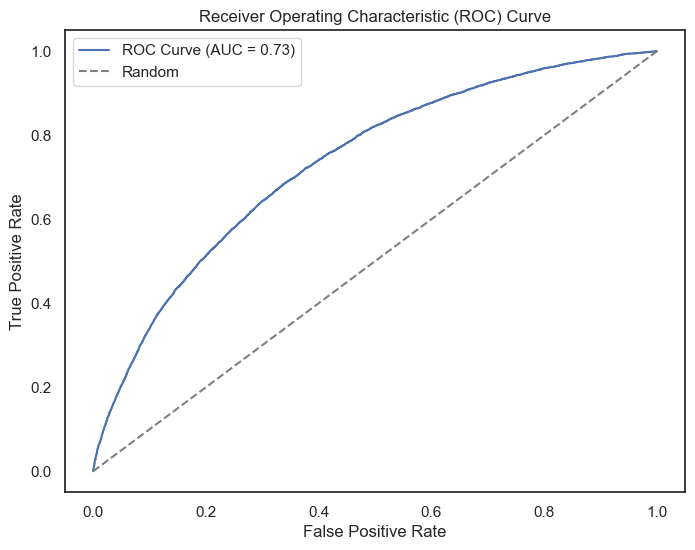

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve

# y_true: True labels (ground truth) for the test set
# y_pred_proba: Predicted probabilities for the positive class (e.g., class 1) from the model
# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


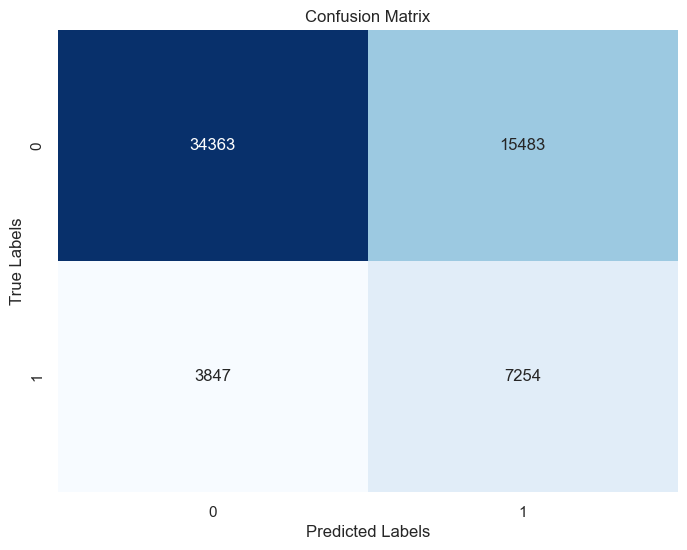

In [81]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()